# Визуализация данных Python
## Домашнее задание

--->[***github***](https://github.com/defygee)<---

In [4]:
import numpy as np

In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,9

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

In [6]:
%matplotlib inline

**Построение графика, описывающего 20 фильмов с наивысшей выручкой**

*Matplotlib*

In [4]:
#Считаем данные из первого датасета
movies = pd.read_csv('movies/tmdb_5000_movies.csv')

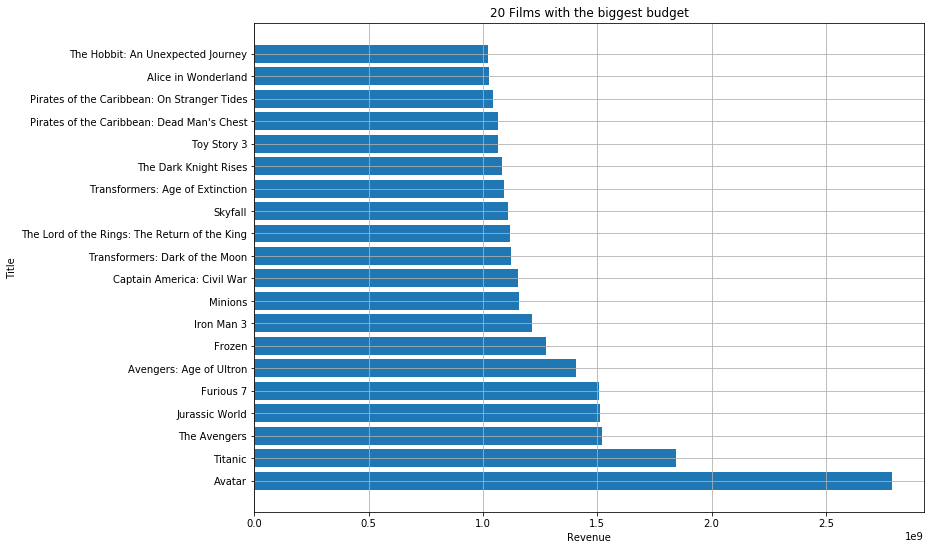

In [21]:
#Фильтруем датасет, чтобы получить 20 фильмов с наивысшей выручкой.
movies_top = movies[['original_title','revenue']].sort_values('revenue', ascending = False).head(20)
#Построение графика с 'барами'
plt.barh(movies_top['original_title'],movies_top['revenue'])
#Оформление графика
plt.xlabel('Revenue')
plt.ylabel('Title')
plt.title('20 Films with the biggest budget')
plt.grid()


**График, показывающий распределение набранных очков по позиции и возрасту баскетболистов**

*Seaborn*

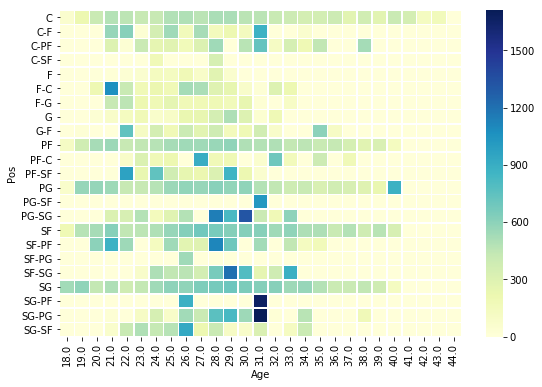

In [71]:
#Считаем данные из первого датасета
nba_stats = pd.read_csv('nba/seasons_stats.csv')

#Отфильруем датасет, чтобы получить нужные нам данные
nba_sb = nba_stats[['Pos','Age','PTS']]
#Удалим все 'битые' значения
nba_sb.dropna()
#Построение графика
nba_l = nba_sb.pivot_table(index='Pos', columns = 'Age', values = 'PTS', aggfunc=np.mean).fillna(0).applymap(float)
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(nba_l, linewidths=.5, cmap="YlGnBu",ax=ax)

**График по игре FIFA Ultimate Team, показывающий изменение цены на легендарную карточку Pele**

*Seaborn*

In [73]:
#Считываем данные по карточкам игроков и их ценах
Fifa_prices = pd.read_csv('FIFA/FIFA19 - Ultimate Team player prices.csv')
Fifa_players = pd.read_csv('FIFA/FIFA19 - Ultimate Team players.csv')
#Соединяем два датасета по ID
Fifa = pd.merge(Fifa_prices,Fifa_players, on = 'resource_id')


In [74]:
#Выбираем необходимые нам данные по определенному игроку
fifa = Fifa[['date', 'ps4','xbox','pc']].loc[(Fifa['player_extended_name'] == 'Arantes Nascimento Edson')].groupby('date').sum()


Text(0.5, 1.0, 'Ultimate Team Pele legend card price changing')

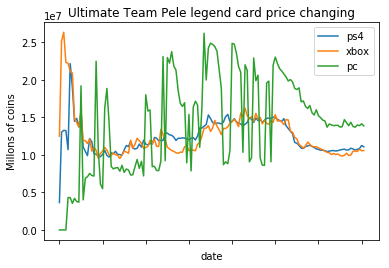

In [75]:
#Построение графика
fifa.plot()
plt.ylabel('Millons of coins')
plt.title('Ultimate Team Pele legend card price changing')


**График, показывающий распределение команд по забитым дома и в гостях мячам(забитых на квалификациях к чемпионатам мира)**

*Plotly*

In [15]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [76]:
#Считываем данные
fball = pd.read_csv('football/results.csv')

In [10]:
#Отфильтруем данные, чтобы получить таблицу в формате команда - голы_дома - голы_в_гостях - кол-во_матчей
fball_home = fball[['home_team','home_score']].loc[(fball['tournament'] == 'FIFA World Cup qualification')].groupby('home_team',as_index=False).mean().sort_values('home_score', ascending = False)
fball_away = fball[['away_team','away_score']].loc[(fball['tournament'] == 'FIFA World Cup qualification')].groupby('away_team',as_index=False).mean().sort_values('away_score', ascending = False)
fball_cnta = fball[['away_team','away_score']].loc[(fball['tournament'] == 'FIFA World Cup qualification')].groupby('away_team',as_index=False).count().sort_values('away_score', ascending = False)
fball_cnth = fball[['home_team','home_score']].loc[(fball['tournament'] == 'FIFA World Cup qualification')].groupby('home_team',as_index=False).count().sort_values('home_score', ascending = False)


fball_home.rename(columns={'home_team': 'team'}, inplace=True)
fball_away.rename(columns={'away_team': 'team'}, inplace=True)

fball_cnth.rename(columns={'home_team': 'team', 'home_score': 'score'}, inplace=True)
fball_cnta.rename(columns={'away_team': 'team','away_score': 'score'}, inplace=True)

#Соединение всех 4 таблиц
fball_cnt = pd.concat([fball_cnta, fball_cnth])
fball_cnttt = fball_cnt.groupby('team',as_index=False).sum().sort_values('score', ascending = False)

join_fball = pd.merge(fball_home, fball_away)
join_fballl = pd.merge(join_fball, fball_cnttt)

In [19]:
import plotly.express as px
#Построение графика
gapminder = px.data.gapminder()

fig = px.scatter(join_fballl, x="home_score", y="away_score",
	          color="team",
                 hover_name="team", log_x=True, size_max=60)
fig.show()

**Распределение зарплат игроков NBA 2000-2019**

*Plotly*

In [77]:
#Считываем данные
nba_salaries = pd.read_csv('nba/NBA_Full_Salaries_2000-2019.csv')


In [78]:
#Построение графика
tips = px.data.tips()
fig = px.box(nba_salaries, x="Year", y="Salaries",notched=True,title="Salaries of NBA players",hover_data=["Name",'Rank'])
fig.show()